In [37]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target  
iris_df




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
iris_df['target'] = (iris_df['target'] == 2).astype(int)


In [39]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


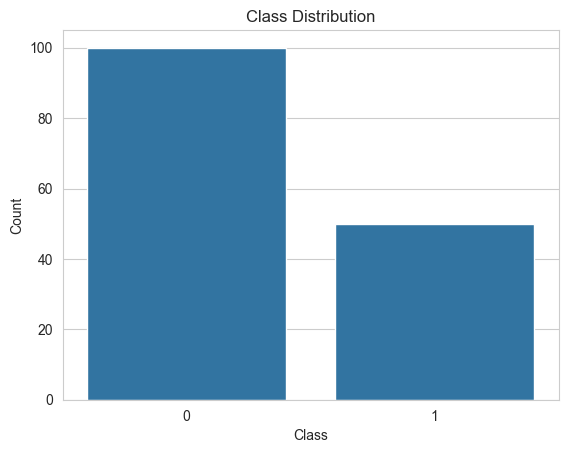

In [40]:
sns.countplot(data=iris_df, x='target')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

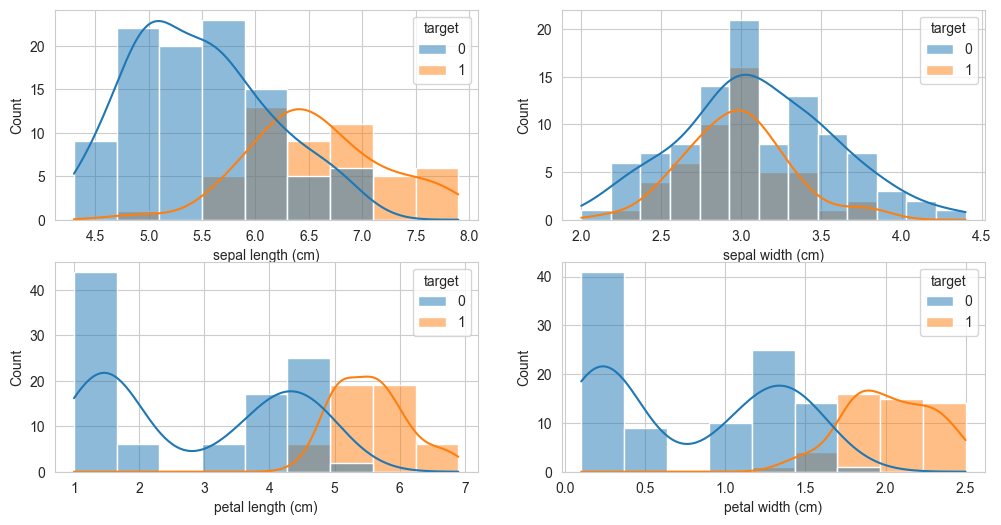

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(iris_df, x=feature, hue='target', kde=True)
plt.show()

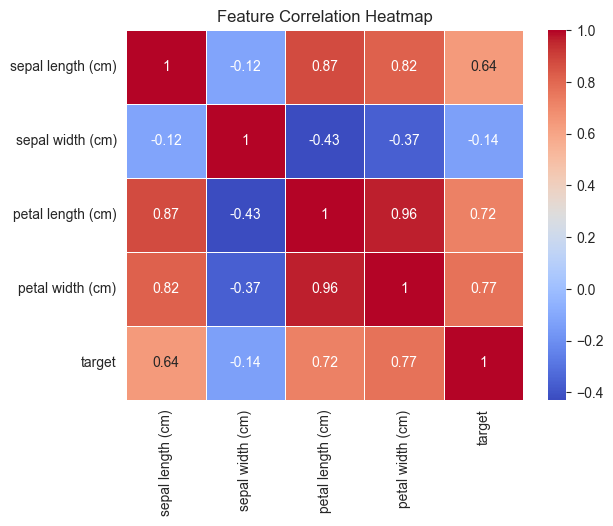

In [42]:
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


<Figure size 1200x800 with 0 Axes>

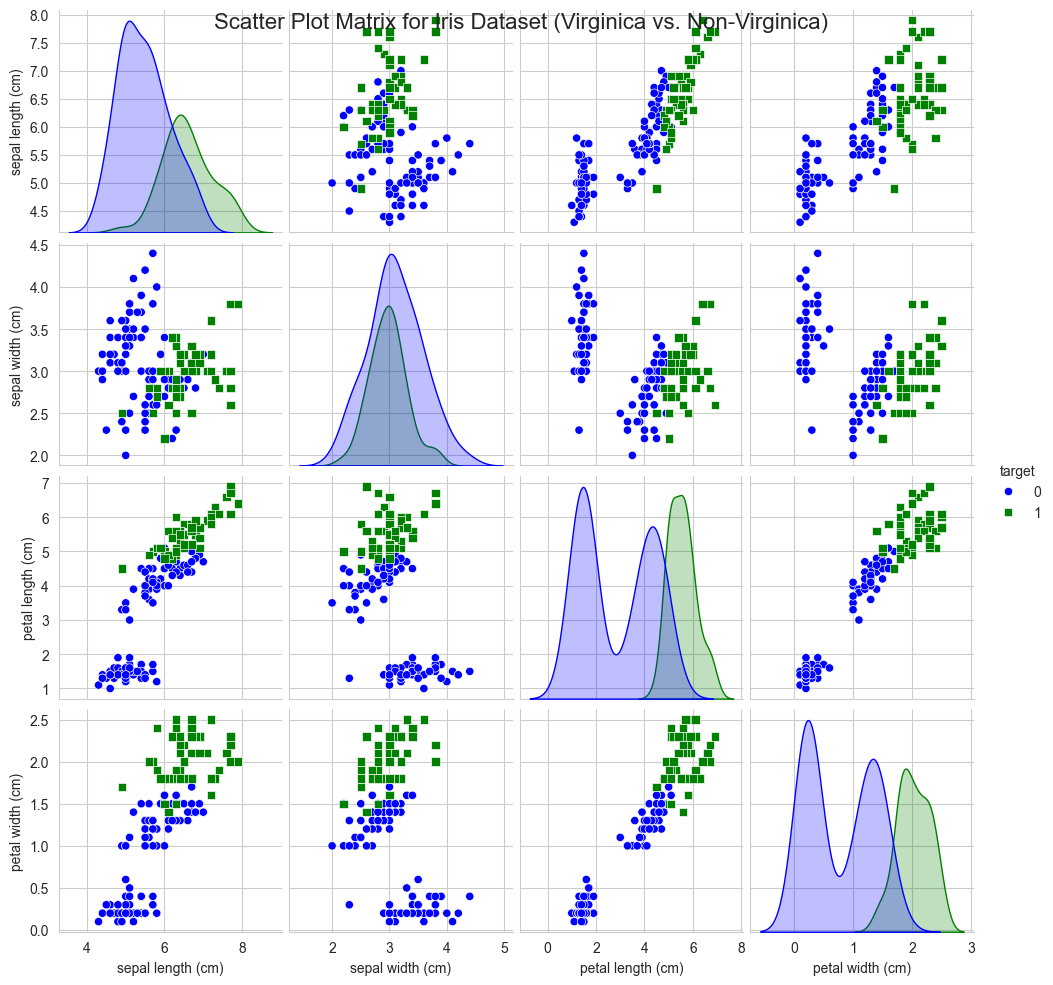

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.pairplot(iris_df, hue='target', palette={0: 'blue', 1: 'green'}, markers=["o", "s"], diag_kind='kde')

plt.suptitle("Scatter Plot Matrix for Iris Dataset (Virginica vs. Non-Virginica)", fontsize=16)
plt.show()


In [44]:
iris_df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])


In [46]:
scaled_df = pd.DataFrame(data=scaled_data, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [47]:
scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = scaled_df
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_clf = LogisticRegression()

logistic_clf.fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)


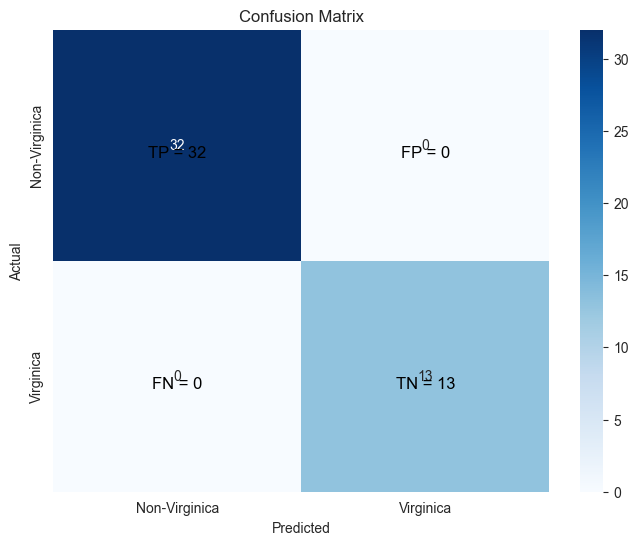

In [68]:
confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Virginica', 'Virginica'], yticklabels=['Non-Virginica', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(0.5, 0.5, f'TP = {confusion_mat[0, 0]}', horizontalalignment='center', verticalalignment='top', fontsize=12, color='black')
plt.text(1.5, 0.5, f'FP = {confusion_mat[0, 1]}', horizontalalignment='center', verticalalignment='top', fontsize=12, color='black')
plt.text(0.5, 1.5, f'FN = {confusion_mat[1, 0]}', horizontalalignment='center', verticalalignment='top', fontsize=12, color='black')
plt.text(1.5, 1.5, f'TN = {confusion_mat[1, 1]}', horizontalalignment='center', verticalalignment='top', fontsize=12, color='black')
plt.title('Confusion Matrix')
plt.show()

In [72]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

- False Positives (Type I Errors): Model predicts "yes" when it should be "no." Can lead to unnecessary actions or costs.- 

- False Negatives (Type II Errors): Model predicts "no" when it should be "yes." Can lead to missed opportunities or risks.

The model correctly predicted the positive class (e.g., 'virginica') 32 times.
There were no instances where the model incorrectly predicted the positive class (Type I error - False Positive).
There were no instances where the model incorrectly predicted the negative class (Type II error - False Negative).
The model correctly predicted the negative class (e.g., 'non-virginica') 13 times.

In this case, the shared property is that the model is making accurate predictions for both the positive and negative classes, resulting in no false positives or false negatives. This suggests a high level of precision and recall, indicating excellent model performance for the given dataset. Further context about the dataset and model is needed to provide more specific insights.


The model is excelling in terms of evaluation metrics, boasting a perfect accuracy score of 1.0 (100%). The provided confusion matrix reinforces this by showing zero occurrences of both False Positives (FP) and False Negatives (FN). This reflects the model's remarkable accuracy and precision.